## price predictor

In [1]:
import pandas as pd

In [2]:
housing= pd.read_csv("housing.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

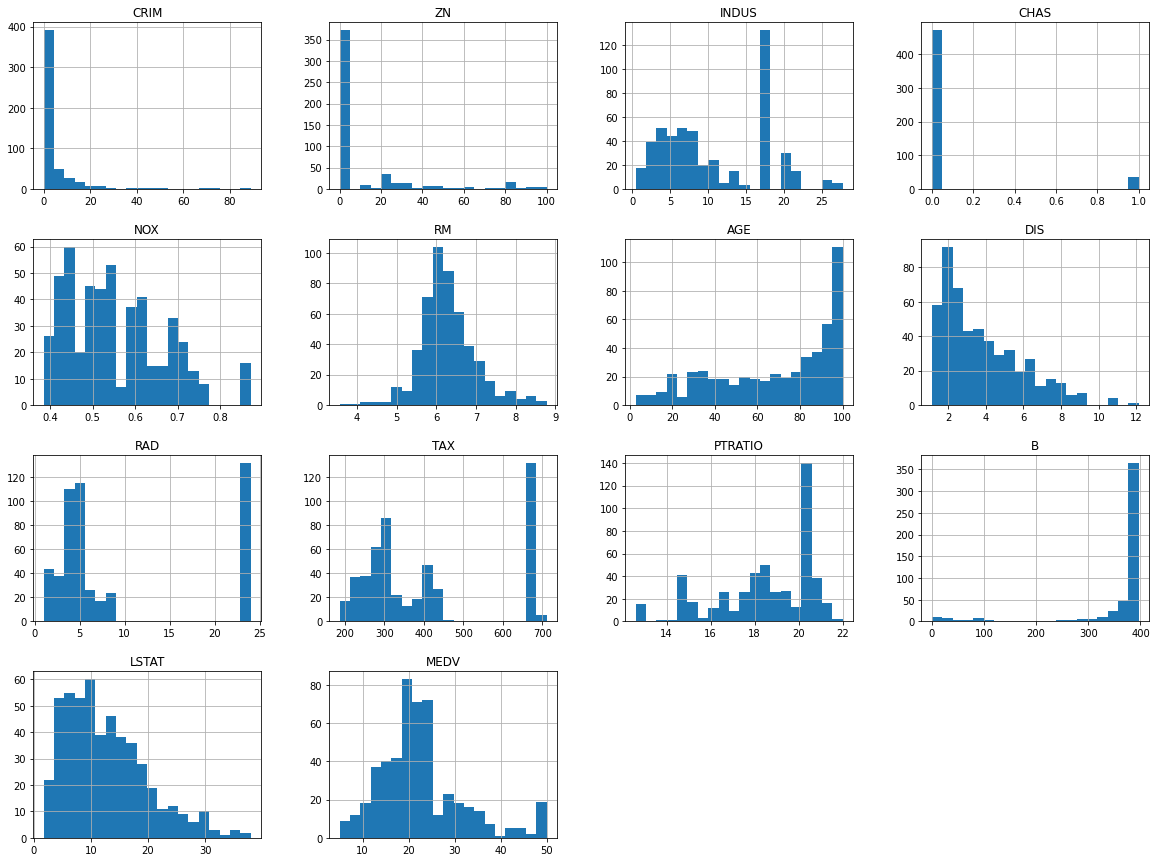

In [8]:
#for ploting histogram
import matplotlib.pyplot as plt
housing.hist(bins=20, figsize=(20, 15))

## train test splitting


In [9]:
#for learning purpose
import numpy as np

def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
    



In [10]:
#train_set, test_set = split_train_test(housing, 0.2)

In [11]:
#print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"rows in the train set: {len(train_set)}\nrows in test set: {len(test_set)}\n")

rows in the train set: 404
rows in test set: 102



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3


In [15]:
strat_train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [16]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [17]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [18]:
#mesurment ratio of train and test data
print(95/7)
print(376/28)

13.571428571428571
13.428571428571429


In [19]:
# for big data  
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [20]:
# for big data                       
housing=strat_test_set.copy()

## Looking for correlations

In [21]:
corr_matrix = housing.corr()

In [22]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.769364
ZN         0.449562
DIS        0.292944
B          0.168425
CHAS       0.043900
CRIM      -0.388768
RAD       -0.414798
AGE       -0.434078
NOX       -0.450991
TAX       -0.525037
INDUS     -0.534485
PTRATIO   -0.573036
LSTAT     -0.726741
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>]], dtype=object)

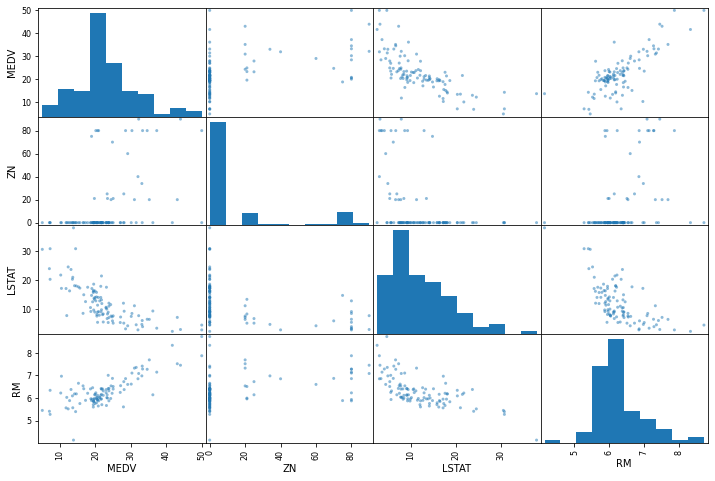

In [23]:
from pandas.plotting import scatter_matrix
attributes=['MEDV', 'ZN', 'LSTAT','RM']
scatter_matrix(housing[attributes],figsize=(12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

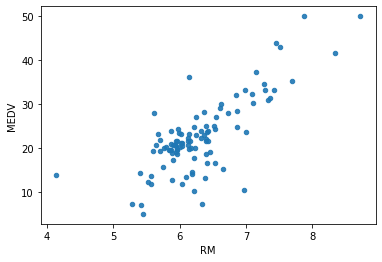

In [24]:
housing.plot(kind="scatter",x="RM", y="MEDV", alpha=0.9)

## Trying out attribute combination

In [25]:
housing["TAXRM"]=housing["TAX"]/housing["RM"]

In [26]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5,64.525994
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2,107.022336
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1,46.388637
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0,43.307704
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4,43.156140


In [27]:
corr_matrix=housing.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.769364
ZN         0.449562
DIS        0.292944
B          0.168425
CHAS       0.043900
CRIM      -0.388768
RAD       -0.414798
AGE       -0.434078
NOX       -0.450991
TAX       -0.525037
INDUS     -0.534485
PTRATIO   -0.573036
TAXRM     -0.597631
LSTAT     -0.726741
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

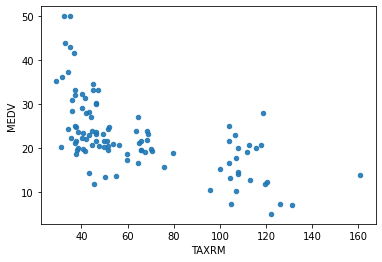

In [28]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.9)

## missing attribute

In [29]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()

In [30]:
#to take care of missing attribute, you have three option:
#get rid of the missing data points
#get rid of the whole attribute             the original housing dataframe remain unchange
#set the value to same value(0,mean or median)

In [31]:
a= housing.dropna(subset=["RM"])
a.shape # get rid of the missing data points

(399, 13)

In [32]:
housing.drop("RM", axis=1).shape  # there is no rm column and also original housing dataframe will unchanged

(404, 12)

In [33]:
median = housing["RM"].median()

In [34]:
median

6.209

In [35]:
housing["RM"].fillna(median) # option 3

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [36]:
housing.shape

(404, 13)

In [37]:
housing.describe() #before filling missing attribute

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [38]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [39]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [40]:
x= imputer.transform(housing)

In [41]:
housing_tr = pd.DataFrame(x, columns=housing.columns)
 

In [42]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# Scikit-learn 

primarly , three types of object

1. estimators   - it estimate some parameter based on a dataset. eg. imputer  
it has a fit methods and transform method.
fit method- fits the dataset and calculates internal parameters 

2. transformers -  transform methods takes input and return output based on the learings from fit(). 
    it has a convenience unction called fit_transform()
    which fits and then transform.
    
3.predictions - linearregration model is an example of predictor. fit() and predict() method are two common functions.
    it also gives score() function which will evaluate the predictions.

## Feature Scaling


primarly , two types of feature scaling methods:

1 min-max : normalization
(value-min)/(max-min)
sklearn provide a class called minmaxScaler for this

2 standarization
(value-mean)/std
sklearn provides a class called standardScaler for this

## creating a pipeline

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
                     # .....add as many as you want in your pipeline
                    ('std_scalar', StandardScaler()),
                     ])

In [44]:
housing_num_tr=my_pipeline.fit_transform(housing_tr)

In [45]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [46]:
housing_num_tr.shape

(404, 13)

## selecting a desired model for company

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)


RandomForestRegressor()

In [48]:
some_data= housing.loc[:5]

In [49]:
some_label=housing_labels.iloc[:5]

In [50]:
prepared_data=my_pipeline.transform(some_data)

In [51]:
model.predict(prepared_data)

array([22.415, 25.114, 16.354, 23.368, 23.457, 16.596, 24.622, 26.428,
       10.513, 31.826, 15.761, 18.339, 10.884, 34.303, 22.886, 13.712,
       18.802, 17.764,  6.591, 20.077, 18.902, 16.555, 17.988, 28.085,
       24.44 , 24.639, 13.582, 20.929, 14.921, 28.138, 14.16 , 17.923,
       11.094, 12.973, 20.46 , 26.97 , 23.444, 47.047, 33.843, 19.811,
       21.919, 34.808, 36.79 ,  9.525, 20.069, 11.961, 21.551, 27.514,
       23.656,  8.069, 24.66 , 23.144, 23.681, 30.226, 14.982, 38.41 ,
       21.47 , 24.818, 33.347, 17.727, 19.916, 19.859, 27.774, 21.116,
       14.099, 31.743, 49.891, 14.782, 26.546, 34.87 , 22.59 , 35.906,
       23.074, 10.231, 20.667, 28.21 , 25.711, 15.141, 16.363, 18.898,
       31.096,  8.404, 19.367, 18.825, 25.887, 22.782, 30.454, 24.761,
       29.114, 15.598, 22.964, 30.167, 28.398, 20.346, 21.524, 34.119,
       31.199, 19.522, 23.12 , 17.134, 12.524, 46.253, 20.504, 44.137,
       17.174, 15.97 , 19.445, 21.478, 27.081, 16.665, 17.193,  7.752,
      

In [52]:
list(some_label)

[21.9, 24.5, 16.7, 23.1, 23.0]

## evaluating the model

In [53]:
from sklearn.metrics import mean_squared_error
housing_predictions= model.predict (housing_num_tr)
mse=mean_squared_error(housing_labels, housing_predictions)
rmse=np.sqrt(mse)

In [54]:
rmse

1.2097424087567372

## using better evaluation technique - cross validation

In [55]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10) 
rmse_scores=np.sqrt(-scores)

In [56]:
rmse_scores

array([2.83691098, 2.76789311, 4.41209182, 2.58325592, 3.22835302,
       2.64696215, 5.00214665, 3.37652191, 3.42449566, 3.42919859])

In [57]:
def print_scores(scores):
    print("scores", scores)
    print("mean:", scores.mean())
    print("standard deviation:",scores.std())

In [58]:
print_scores(rmse_scores)

scores [2.83691098 2.76789311 4.41209182 2.58325592 3.22835302 2.64696215
 5.00214665 3.37652191 3.42449566 3.42919859]
mean: 3.370782980177516
standard deviation: 0.7459825177342253


## saving the data

In [59]:
from joblib import dump, load
dump(model, 'company.joblib')

['company.joblib']

##  testing the model on test data

In [64]:
x_test = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set["MEDV"].copy()
x_test_prepared=my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(y_test))


[24.369 11.331 25.509 21.337 19.083 15.149 20.392 14.597 32.09  40.979
 19.709 11.149 24.893 27.011 19.696 10.631 31.534 14.773 23.548 19.616
 20.074 17.923 16.315 22.023 18.392 31.461 16.346 32.936  8.507 33.371
 23.372 21.389 22.583 11.088 21.145 11.37  43.972 24.549 23.254 43.279
 24.156 29.844 20.405 20.778 18.654 33.615 44.596 20.285 20.224 21.932
 21.125 14.249 21.651 15.    24.687 33.322 42.813 29.265 19.277 20.833
 46.851  9.987 19.211 24.6   14.667 33.253 19.767 17.763 19.466 33.684
 25.908 22.712 21.245 22.601 33.939 13.181 15.666 20.182 20.653 21.322
 22.186 21.291 14.021 22.42  20.567 21.164 14.502 21.352 21.702 23.669
 18.724 27.33   7.098 26.534 19.203 29.13  19.86  30.898 14.885 26.922
 21.618 20.239] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1

In [63]:
final_rmse

2.8901941772747604

In [65]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])